<br><p style="margin-left: 25%; font-size:20px;">Machine Learning Camp: HomeWork 5</p><br>

In [35]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# nltk.download('stopwords')
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aminr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [31]:
from nltk.corpus import stopwords
from string import punctuation

from nltk.tokenize import word_tokenize

##
<span style="font-wight:bold;font-size:20px">1. Text Data analysis:</span> using “lincoln-last-speech.txt” which contains Lincoln’s last public address. Now answer the following questions and include your codes.

##### a) Read the text and store the text in lAddress. Show the first 70 characters from the first element of the text.

In [4]:
with open("lincoln-last-speech.txt","r") as text:
    print(text.read(70))

We meet this evening, not in sorrow, but in gladness of heart. The eva


##### b) Now we are interested in the words used in his speech. Extract all the words from lAddress, convert all of them to lower case and store the result in vWord. Display first few words.

In [46]:
with open("lincoln-last-speech.txt","r") as text:
    t = text.read()
    no_punc_txt = "".join([char for char in t if char not in punctuation])
    
    word_tokens = word_tokenize(no_punc_txt)


In [47]:
vWords = [word.lower() for word in word_tokens]
vWords[:5]

['we', 'meet', 'this', 'evening', 'not']

##### c) The words like am, is, my or through are not much of our interest and these types of words are called stop-words. Get all the English stop words and store them in sWord. Display few stop words in your report.

In [48]:
sWords = stopwords.words("english")

In [49]:
sWords[:5]

['i', 'me', 'my', 'myself', 'we']

##### d) Remove all the sWord from vWord and store the result in cleanWord. Display first few clean words.

In [50]:
cleanWords = [word for word in vWords if (word.lower() not in sWords) ]

In [51]:
cleanWords[:10]

['meet',
 'evening',
 'sorrow',
 'gladness',
 'heart',
 'evacuation',
 'petersburg',
 'richmond',
 'surrender',
 'principal']

##### f) Construct a bar chart showing the count of each words for the 15 most frequently used words.

In [52]:
cleanWords_sr = pd.Series(cleanWords)

In [57]:
frequent_words_sr = cleanWords_sr.value_counts().nlargest(15)

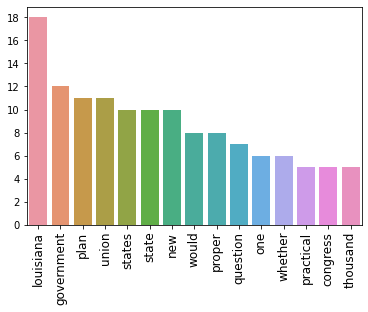

In [95]:
fig , ax = plt.subplots(ncols=1 , nrows = 1)

ax  = sns.barplot(x= frequent_words_sr.index ,y = frequent_words_sr.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90 , fontdict={"size" : 12});
ax.set_yticks(range(0,20,2));


##### h) The plot in question (1f) uses bar plot to display the data. Can you think of another plot that delivers the same information but looks much simpler? Demonstrate your answer by generating such a plot.

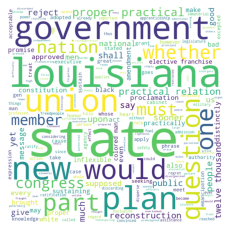

In [111]:
import wordcloud
wordcloud = wordcloud.WordCloud(width = 800, height = 800, 
                      background_color ='white', stopwords = stopwords.words('english'),
                      min_font_size = 10).generate(" ".join(cleanWords_sr.to_list()))
 
plt.figure(figsize = (3, 3), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##
<span style="font-wight:bold;font-size:20px">2. Answering Questions from Data:</span> Download the data from [ 
https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/flights.csv ]. Answer the following questions using this data.


##### a) What month had the highest proportion of cancelled flights? What month had the lowest? Interpretany seasonal patterns. Please produce a plot that illustrates the proportion of cancelled flights for each month.

In [114]:
flights_df = pd.read_csv("flights.csv")

In [119]:
flights_df["arr_time"].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
336771     True
336772     True
336773     True
336774     True
336775     True
Name: arr_time, Length: 336776, dtype: bool

In [125]:
flights_df["is_canceled"] = flights_df["arr_time"].isna().apply(lambda x: True if x else False)

In [137]:
canceled_flights = flights_df.groupby("month",as_index=True).sum()["is_canceled"]

In [141]:
num_flights_per_month = flights_df.groupby("month",as_index=True).size()

In [145]:
canceled_flights_perc = canceled_flights*100 / num_flights_per_month

In [147]:
canceled_flights_perc

month
1     1.984891
2     5.174141
3     3.090102
4     2.506177
5     2.087095
6     3.795631
7     3.544605
8     1.725373
9     1.827809
10    0.854997
11    0.927827
12    3.763995
dtype: float64

In [149]:
flights_df.pivot_table(index="is_canceled" , columns= "month",aggfunc="size")

month,1,2,3,4,5,6,7,8,9,10,11,12
is_canceled,,,,,,,,,,,,
False,26468,23660,27943,27620,28195,27171,28382,28821,27070,28642,27015,27076
True,536,1291,891,710,601,1072,1043,506,504,247,253,1059


<AxesSubplot:xlabel='month'>

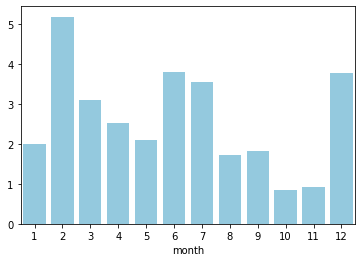

In [155]:
sns.barplot(x= canceled_flights_perc.index , y = canceled_flights_perc.values , color= "#87ceeb")

##### b) What plane (specified by the tailnum variable) traveled the most times from New York City airports in 2013? Plot the number of trips per week over the year.

In [163]:
flights_df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,is_canceled
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,False
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,False
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,False
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,False
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,True
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,True
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,True
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,True


In [164]:
flights_df["date"] = pd.to_datetime(flights_df[["year" , "month" , "day"]])

In [160]:
flights_df["origin"].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [161]:
# LaGuardia and John F. Kennedy airports both in NYC

In [175]:
flights_df_2013 = flights_df[(flights_df["date"] >= "2013") & (flights_df["date"] < "2014") ]

In [184]:
(flights_df_2013[(flights_df_2013["origin"] == "LGA" ) | (flights_df_2013["origin"] == "JFK" )]
 .groupby("tailnum")
 .size()
.sort_values(ascending=False)
.nlargest(1))

tailnum
N725MQ    575
dtype: int64

In [192]:
### flights per week for all planes
flights_df_2013["week_of_year"] = flights_df_2013 ["date"].dt.isocalendar().week

In [194]:
flights_per_week = flights_df_2013.groupby("week_of_year").size()

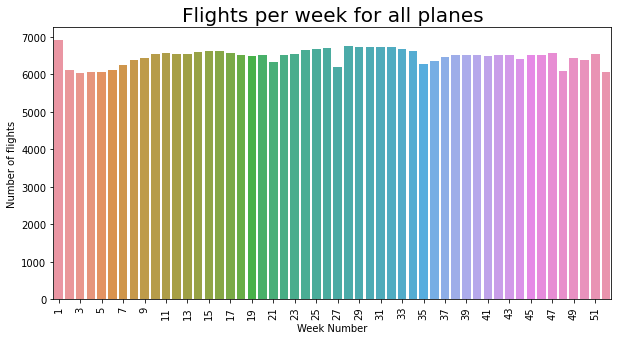

In [240]:
fig , ax = plt.subplots(ncols=1 , nrows = 1,figsize = (10,5))
ax = sns.barplot(x = flights_per_week.index , y = flights_per_week.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
ax.set_title("Flights per week for all planes" ,fontdict={"size" : 20});
ax.set_xlabel("Week Number")
ax.set_yticks(range(0,int(ax.get_yticks()[-1]),1000));
ax.set_ylabel("Number of flights");
ax.set_xticks(range(0,ax.get_xticks()[-1], 2));

In [206]:
### flights per week for N725MQ
temp = flights_df_2013[flights_df_2013["tailnum"] == "N725MQ"].groupby("week_of_year").size()

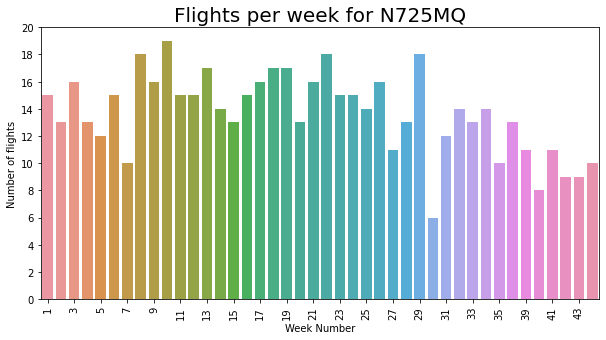

In [234]:
fig , ax = plt.subplots(ncols=1 , nrows = 1,figsize = (10,5))
ax = sns.barplot(x = temp.index , y = temp.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
ax.set_title("Flights per week for N725MQ" ,fontdict={"size" : 20});
ax.set_xlabel("Week Number")
ax.set_yticks(range(0,22,2));
ax.set_ylabel("Number of flights");
ax.set_xticks(range(0,ax.get_xticks()[-1], 2));
# ax.set_xticklabels(["do" , "Se" ],rotation = 90);


##### c) Download theuniqueane data from [ https://github.com/MapsaBootCamp/useful_datasets/blob/master/structuralData/planes.csv ]. Use the flights and planes tables to answer the following questions: What is the oldest plane (specified by the tailnum variable) that flew from New York City airports in 2013? How many airplanes that flew from New York City are included in the planes table?

In [241]:
planes_df = pd.read_csv("planes.csv")

In [255]:
flights_from_nyc = flights_df_2013[(flights_df_2013["origin"] == "LGA" ) | (flights_df_2013["origin"] == "JFK" )] 

In [256]:
# Oldest plane from NYC:
(pd.merge(flights_from_nyc, planes_df, how = "inner" , on = "tailnum")
 .sort_values(by = "year_y")
 .reset_index()
 .loc[0])

index                              152304
year_x                               2013
month                                   1
day                                    30
dep_time                            741.0
sched_dep_time                        745
dep_delay                            -4.0
arr_time                           1059.0
sched_arr_time                       1125
arr_delay                           -26.0
carrier                                AA
flight                                 59
tailnum                            N381AA
origin                                JFK
dest                                  SFO
air_time                            350.0
distance                             2586
hour                                    7
minute                                 45
time_hour             2013-01-30 07:00:00
is_canceled                         False
date                  2013-01-30 00:00:00
week_of_year                            5
year_y                            

In [257]:
# All planes from nyc
flights_from_nyc.tailnum.nunique()

3591

In [258]:
# How many airplanes that flew from New York City are included in the planes table?
pd.merge(flights_from_nyc, planes_df, how = "inner" , on = "tailnum").tailnum.nunique()

2888

##### d) Use the flights and planes tables to answer the following questions: How many planes have a missing date of manufacture? What are the five most common manufacturers (Note: pay close attention to the same manufacturer being represented multiple times)? Has the distribution of manufacturer changed over time as reflected by the airplanes flying from NYC in 2013? Produce a plot that backs up your claim.

In [9]:
#TODO

##
<span style="font-wight:bold;font-size:20px">3. Regular Expressions:</span> Write a regular expression to match patterns in the following strings. Demonstrate
that your regular expression indeed matched that pattern by including codes and results.

##### a) We have a list vText as follows. Write a regular expression that matches g, og, go or ogo in vText and replace the matches with ‘.’.

In [11]:
vText = ['google','logo','dig', 'blog', 'boogie']

In [12]:
#TODO

##### b) Replace only the 5 or 6 digit numbers with the word “found” in the following list. Please make sure that 3, 4, or 7 digit numbers do not get changed.

In [13]:
vPhone = ['874','6783','345345', '32120', '468349', '8149674']

In [14]:
#TODO

##### c) Replace all the characters that are not among the 26 English characters or a space. Please replace with an empty spring.

In [15]:
myText = "#y%o$u @g!o*t t9h(e) so#lu!tio$n c%or_r+e%ct"

In [16]:
#TODO

##### d) In the following text, replace all the words that are exactly 3 or 4 characters long with triple dots ‘. . . ’

In [17]:
myText = "Each of the three and four character words will be gone now"

In [18]:
#TODO

##### e) Extract all the three numbers embedded in the following text.

In [19]:
bigText = 'There are four 20@14 numbers hid989den in the 500 texts'

In [20]:
#TODO

##### f) Extract all the words between parenthesis from the following string text and count number of words.

In [21]:
myText = 'The salries are reported (in millions) for every company.'

In [22]:
#TODO

##### g) Extract the texts in between _ and dot(.) in the following list. Your output should be ‘bill’, ‘pay’, ‘fine-book’.

In [23]:
myText = ["H_bill.xls", "Big_H_pay.xls", "Use_case_fine-book.pdf"]

In [24]:
#TODO

##### h) Extract the numbers (return only integers) that are followed by the units ‘ml’ or ‘lb’ in the following text.

In [25]:
myText = 'Received 10 apples with 200ml water at 8pm with 15 lb meat and 2lb salt'

In [26]:
#TODO

##### i) Extract only the word in between pair of symbols \\$. Count number of words you have found between pairs of dollar sign \\$

In [27]:
myText = 'Math symbols are $written$ in $between$ dollar $signs$'

In [28]:
#TODO

##### j) Extract all the valid equations in the following text.

In [29]:
myText = 'equation1: 2+3=5, equation2 is: 2*3=6, do not extract 2w3=6'

In [30]:
#TODO